***

# Sparse Distributed Memory Experiments

This notebook explores Sparse Distributed Memory (SDM) through various experimental implementations. Core functionality is provided by the `KanervaSDM` module, developed from Pentti Kanerva's 1992 work *Sparse Distributed Memory and Related Models*. The `KanervaSDM` module operates on binary address and memory vectors, and provides a minimalist foundation for more sophisticated implementations. 

The implementations in this notebook will generally set the address and memory dimensions to be equal and refer to both as simply "dimension", however the `KanervaSDM` module does allow them to be different. Also, SDM of dimension 100 with 10,000 hard locations, and an activation threshold of 38 will be considered the "standard" configuration, as it offers a balance of memory performance and computational speed. 

© 2025 Simon Wong

***

**Table of Contents**

- 1.0 SDM experiments with address and memory vectors that are different
    - 1.1 Storing and recalling a single memory, then calculating error
    - 1.2 Storing and recalling multiple memories, then calculating error after all memories have been stored
    - 1.3 Storing and recalling multiple memories, calculating error after each new memory is stored
    - 1.4 Varying dimension 
    - 1.5 Varying activation threshold
    - 1.6 Varying number of hard locations 
- 2.0 SDM experiments with address and memory vectors that are the same 
    - 2.1 Storing and recalling a single memory, then calculating error
    - 2.2 Storing and recalling multiple memories, then calculating error after all memories have been stored
    - 2.3 Storing and recalling multiple memories, calculating error after each new memory is stored
    - 2.4 Varying dimension 
    - 2.5 Varying activation threshold
    - 2.6 Varying number of hard locations 
- 3.0 Visualizing SDM
    - 3.1 

***

In [100]:
from KanervaSDM import KanervaSDM
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm

***

## 1.0 SDM experiments with address and memory vectors that are **different**

SDM with address and memory vectors that are **different** represent a more general case, and tend to exhibit worse recall performance than SDM with address and memory vectors that are the same. 
***

### 1.1 Storing and recalling a single memory, then calculating error

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 

The output shows that with only one stored memory, there is no recall error. 

In [102]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,
    activation_threshold=38 
)

# Create random address vector and memory vector.
address = np.random.randint(0, 2, SDM.memory_dimension)
memory = np.random.randint(0, 2, SDM.memory_dimension)

# Write memory. 
SDM.write(address, memory)

# Read memory. 
recalled_memory = SDM.read(address)

# Calculate error. 
error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

print(f"\nOriginal memory: \n{memory}")

print(f"\nRecalled memory: \n{recalled_memory}")

print(f"\nRecall error: {error:.2f}%.")


Original memory: 
[0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0]

Recalled memory: 
[0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0]

Recall error: 0.00%.


### 1.2 Storing and recalling multiple memories, then calculating error after all memories have been stored

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 
- Memories are read and error is calculated only after all memories have been written. 

The output shows that once many memories are stored, SDM starts to decay.

In [231]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=38
)

num_memories = 1000

# Create arrays for storing addresses and memories. 
addresses = np.empty((num_memories, SDM.address_dimension))
memories = np.empty((num_memories, SDM.memory_dimension))
recalled_memories = np.empty((num_memories, SDM.memory_dimension))
errors = np.empty(num_memories)

# Write all memories. 
for i in range(num_memories): 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = np.random.randint(0, 2, SDM.memory_dimension)
    addresses[i] = address
    memories[i] = memory
    SDM.write(address, memory)
    
# Read all memories.  
for i in range(num_memories): 
    address = addresses[i]
    recalled_memory = SDM.read(address)
    recalled_memories[i] = recalled_memory
    
# Calcuate error:  
for i in range(num_memories):
    errors[i] = np.sum(memories[i] != recalled_memories[i])
    
mean_error = np.mean(errors) / SDM.memory_dimension * 100
max_error = np.max(errors) / SDM.memory_dimension *100
max_error_idx = np.argmax(errors)

print(f"\nMean recall error: {mean_error:.2f}%.")
print(f"\nMax recall error: {max_error:.2f}%.")



Mean recall error: 2.36%.

Max recall error: 9.00%.


### 1.3 Storing and recalling multiple memories, calculating error after each new memory is stored

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are different. 
- Memories are read and error is calculated after each new memory is written. 
- Activation threshold is intentionally bad, to show memory decay as new memories are addded. 

This cell takes around ten seconds (10s) to run. 

The outputted plot shows that as the number of stored memories increases, the recall performance decreases, and more errors occur. 

100%|██████████| 100/100 [00:05<00:00, 19.90it/s]


Final mean recall error: 30.50%

Final max recall error: 43.00%


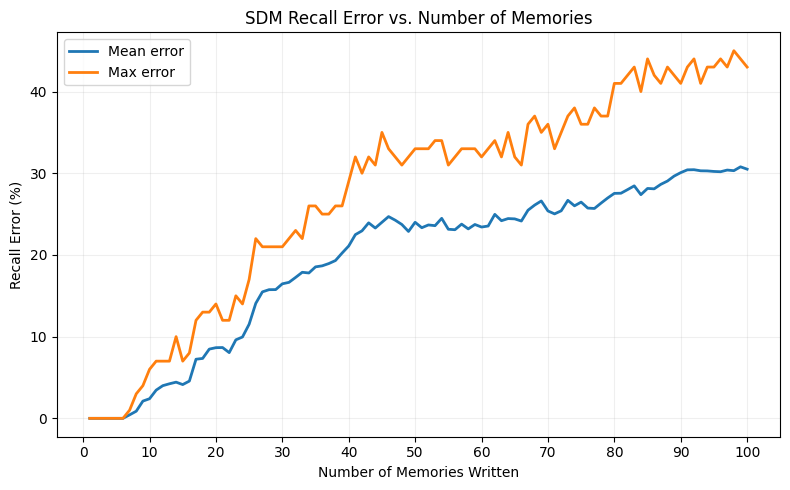

In [ ]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,  
    activation_threshold=45  # Bad activation threshold intentional, to show memory decay. 
)

num_memories = 100

addresses = []
memories = []
mean_errors = []
max_errors = []

for i in tqdm(range(num_memories)): 
    # Generate and store new memory. 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = np.random.randint(0, 2, SDM.memory_dimension)
    
    addresses.append(address)
    memories.append(memory)
    
    SDM.write(address, memory)
    
    # Check recall error for all memories written so far. 
    errors = []
    for j in range(i + 1):
        recalled_memory = SDM.read(addresses[j])
        error = np.sum(memories[j] != recalled_memory)
        errors.append(error)
    
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_error = np.max(errors) / SDM.memory_dimension * 100
    max_errors.append(max_error)

print(f"\nFinal mean recall error: {mean_errors[-1]:.2f}%")
print(f"\nFinal max recall error: {max_errors[-1]:.2f}%")

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_memories + 1), mean_errors, linewidth=2, label="Mean error")
plt.plot(range(1, num_memories + 1), max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Memories Written")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Memories")
plt.xticks(range(0, num_memories + 1, 10))  # Every 10th integer. 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.4 Varying dimension

In this example: 
- Address and memory dimensions are equal, and they are incremented from 10 to 500. 
- Address and memory vectors are different. 
- The number of stored memories is equal to the dimension value. 

This cell takes around ten seconds (30s) to run. 

The outputted plot shows that the optimal dimension is 100. However, the optimal dimension is related to the activation threshold, which for all dimensions was set to 38. 

100%|██████████| 6/6 [00:32<00:00,  5.47s/it]


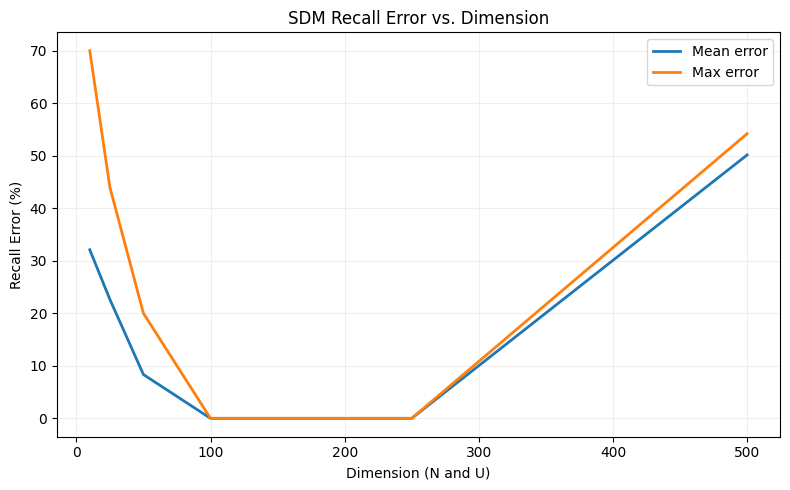

In [235]:
dimensions = [10, 25, 50, 100, 250, 500]
mean_errors = []
max_errors = []

# Outer loop over dimensions. 
for dim in tqdm(dimensions):
    SDM = KanervaSDM(
        address_dimension=dim,
        memory_dimension=dim,
        num_locations=dim**2,  
        activation_threshold=0.38*dim  # This activation threshold is best suited for dimension of 100. 
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories.
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors.
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(dimensions, max_errors, linewidth=2, label="Max error")
plt.xlabel("Dimension (N and U)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.5 Varying activation threshold

In this example: 
- Address and memory dimensions are equal, and they have a value of 100. 
- Address and memory vectors are different. 
- Activation threshold is incremented from 0 to 100. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that for SDM with dimension 100, the optimal activation threshold is approximately 38. 
However, optimal activation threshold is not universally 0.38 times the dimension. 

100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


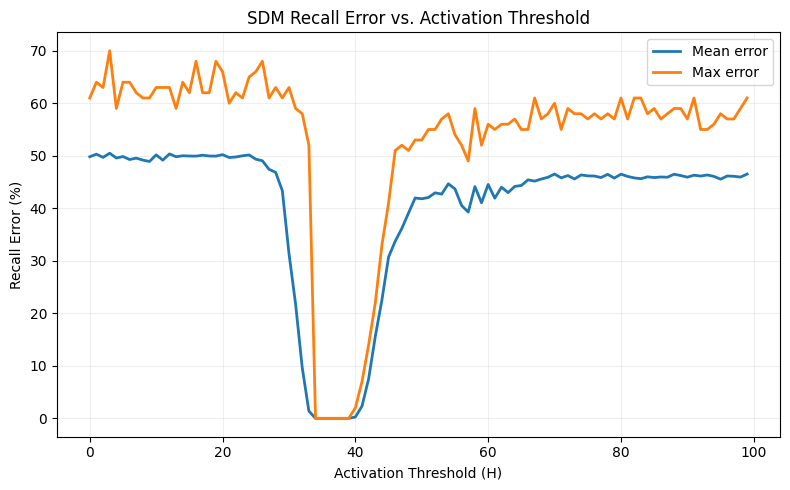

In [ ]:
activation_thresholds = np.arange(0, 100, 1)
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for H in tqdm(activation_thresholds):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=10000,  
        activation_threshold=H
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories. 
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(activation_thresholds, mean_errors, linewidth=2, label="Mean error")
plt.plot(activation_thresholds, max_errors, linewidth=2, label="Max error")
plt.xlabel("Activation Threshold (H)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Activation Threshold")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 1.6 Varying number of hard locations

In this example: 
- Address and memory dimensions are equal, and they have a value of 100
- Address and memory vectors are different. 
- Number of hard locations is incremented from 1 to 10000. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that increasing the number of hard locations decreases the error. Unfortunately, increasing the number of hard locations also increases the computational cost. 


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


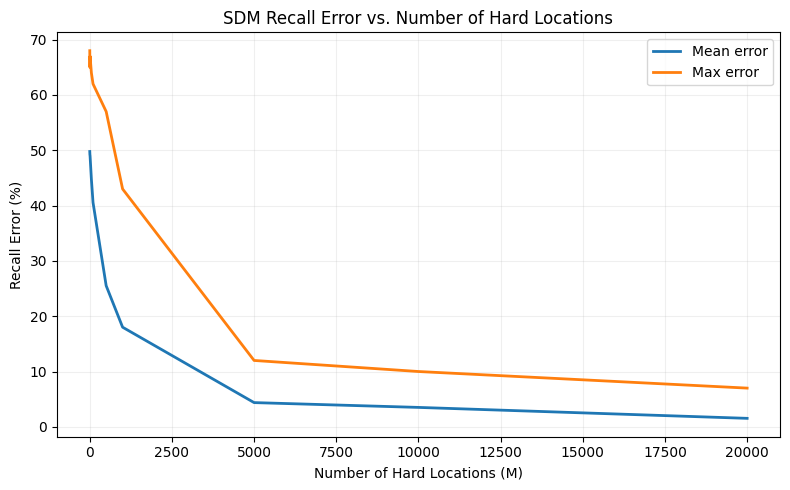

In [ ]:
from tqdm import tqdm

num_locations = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000]
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for M in tqdm(num_locations):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=M,  
        activation_threshold=38
    )
    num_memories = 1000

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = np.random.randint(0, 2, SDM.memory_dimension)
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(num_locations, mean_errors, linewidth=2, label="Mean error")
plt.plot(num_locations, max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Hard Locations (M)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Hard Locations")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

***

## 2.0 SDM experiments with address and memory vectors that are the **same** 

SDM with address and memory vectors that are the **same** generally performs better. 
***

### 2.1 Storing and recalling a single memory, then calculating error

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 

The output shows that with only one stored memory, there is no recall error. 

In [228]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,
    activation_threshold=38 
)

# Create random address vector and memory vector.
address = np.random.randint(0, 2, SDM.memory_dimension)
memory = address.copy()

# Write memory. 
SDM.write(address, memory)

# Read memory. 
recalled_memory = SDM.read(address)

# Calculate error. 
error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

print(f"\nOriginal memory: \n{memory}")

print(f"\nRecalled memory: \n{recalled_memory}")

print(f"\nRecall error: {error:.2f}%.")


Original memory: 
[0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0]

Recalled memory: 
[0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0]

Recall error: 0.00%.


### 2.2 Storing and recalling multiple memories, then calculating error after all memories have been stored

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 
- Memories are read and error is calculated only after all memories have been written. 

The output shows that once many memories are stored, SDM starts to decay. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

In [232]:
SDM = KanervaSDM(
    address_dimension=100,
    memory_dimension=100, 
    num_locations=10000, 
    activation_threshold=38
)

num_memories = 1000

# Create arrays for storing addresses and memories. 
addresses = np.empty((num_memories, SDM.address_dimension))
memories = np.empty((num_memories, SDM.memory_dimension))
recalled_memories = np.empty((num_memories, SDM.memory_dimension))
errors = np.empty(num_memories)

# Write all memories. 
for i in range(num_memories): 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = address.copy()
    addresses[i] = address
    memories[i] = memory
    SDM.write(address, memory)
    
# Read all memories.  
for i in range(num_memories): 
    address = addresses[i]
    recalled_memory = SDM.read(address)
    recalled_memories[i] = recalled_memory
    
# Calcuate error:  
for i in range(num_memories):
    errors[i] = np.sum(memories[i] != recalled_memories[i])
    
mean_error = np.mean(errors) / SDM.memory_dimension * 100
max_error = np.max(errors) / SDM.memory_dimension *100
max_error_idx = np.argmax(errors)

print(f"\nMean recall error: {mean_error:.2f}%.")
print(f"\nMax recall error: {max_error:.2f}%.")



Mean recall error: 0.25%.

Max recall error: 2.00%.


### 2.3 Storing and recalling multiple memories, calculating error after each new memory is stored

In this example: 
- Address and memory dimensions are equal. 
- Address and memory vectors are the same. 
- Memories are read and error is calculated after each new memory is written. 
- Activation threshold is intentionally bad, to show memory decay as new memories are addded. 

This cell takes around ten seconds (10s) to run. 

The outputted plot shows that as the number of stored memories increases, the recall performance decreases, and more errors occur. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

100%|██████████| 100/100 [00:07<00:00, 13.02it/s]



Final mean recall error: 21.37%

Final max recall error: 31.00%


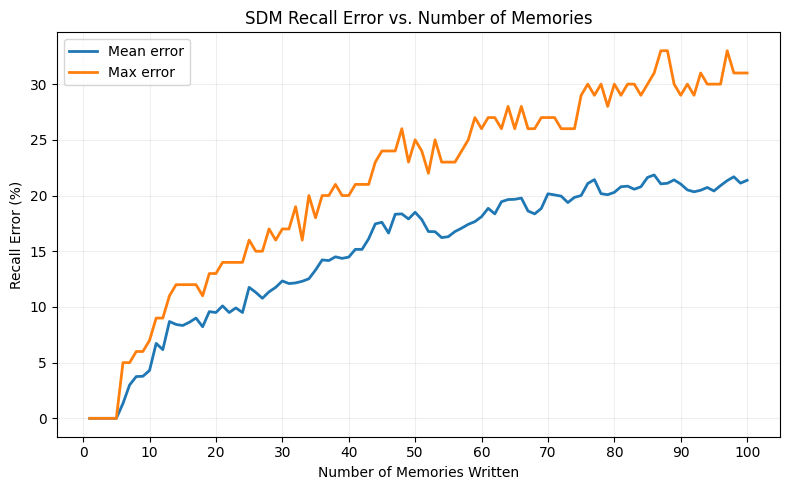

In [233]:
SDM = KanervaSDM(
    address_dimension=100, 
    memory_dimension=100, 
    num_locations=10000,  
    activation_threshold=45  # Bad activation threshold intentional, to show memory decay. 
)

num_memories = 100

addresses = []
memories = []
mean_errors = []
max_errors = []

for i in tqdm(range(num_memories)): 
    # Generate and store new memory. 
    address = np.random.randint(0, 2, SDM.address_dimension)
    memory = address.copy()
    
    addresses.append(address)
    memories.append(memory)
    
    SDM.write(address, memory)
    
    # Check recall error for all memories written so far. 
    errors = []
    for j in range(i + 1):
        recalled_memory = SDM.read(addresses[j])
        error = np.sum(memories[j] != recalled_memory)
        errors.append(error)
    
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_error = np.max(errors) / SDM.memory_dimension * 100
    max_errors.append(max_error)

print(f"\nFinal mean recall error: {mean_errors[-1]:.2f}%")
print(f"\nFinal max recall error: {max_errors[-1]:.2f}%")

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_memories + 1), mean_errors, linewidth=2, label="Mean error")
plt.plot(range(1, num_memories + 1), max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Memories Written")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Memories")
plt.xticks(range(0, num_memories + 1, 10))  # Every 10th integer. 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.4 Varying dimension

In this example: 
- Address and memory dimensions are equal, and they are incremented from 10 to 500. 
- Address and memory vectors are the same. 
- The number of stored memories is equal to the dimension value. 

This cell takes around ten seconds (30s) to run. 

The outputted plot shows that the optimal dimension is 100. However, the optimal dimension is related to the activation threshold, which for all dimensions was set to 38. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

100%|██████████| 6/6 [00:34<00:00,  5.67s/it]


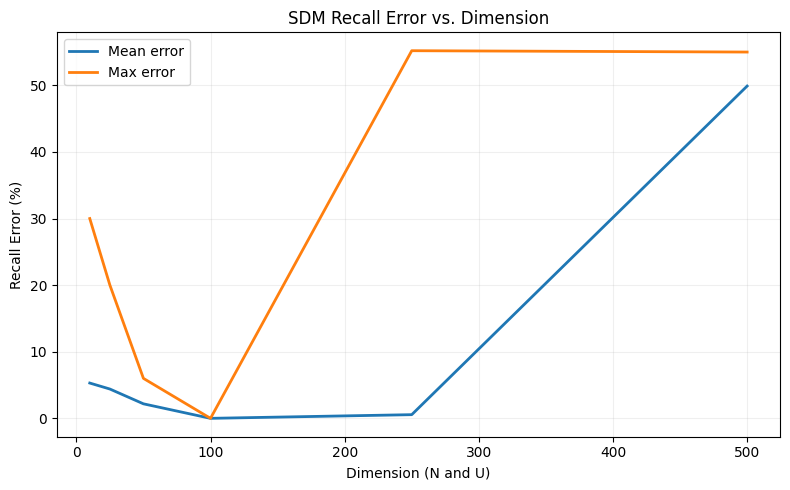

In [236]:
dimensions = [10, 25, 50, 100, 250, 500]
mean_errors = []
max_errors = []

# Outer loop over dimensions. 
for dim in tqdm(dimensions):
    SDM = KanervaSDM(
        address_dimension=dim,
        memory_dimension=dim,
        num_locations=dim**2,  
        activation_threshold=0.38*dim  # This activation threshold is best suited for dimension of 100. 
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories.
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors.
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(dimensions, max_errors, linewidth=2, label="Max error")
plt.xlabel("Dimension (N and U)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.5 Varying activation threshold

In this example: 
- Address and memory dimensions are equal, and they have a value of 100. 
- Address and memory vectors are the same. 
- Activation threshold is incremented from 0 to 100. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that for SDM with dimension 100, the optimal activation threshold is approximately 38. 
However, optimal activation threshold is not universally 0.38 times the dimension. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 

100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


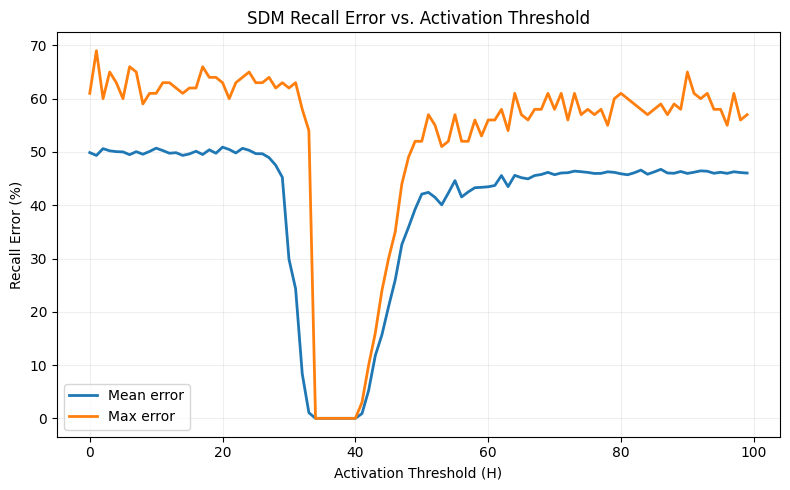

In [238]:
activation_thresholds = np.arange(0, 100, 1)
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for H in tqdm(activation_thresholds):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=10000,  
        activation_threshold=H
    )
    num_memories = 100

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories. 
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(activation_thresholds, mean_errors, linewidth=2, label="Mean error")
plt.plot(activation_thresholds, max_errors, linewidth=2, label="Max error")
plt.xlabel("Activation Threshold (H)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Activation Threshold")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### 2.6 Varying number of hard locations

In this example: 
- Address and memory dimensions are equal, and they have a value of 100
- Address and memory vectors are the same. 
- Number of hard locations is incremented from 1 to 10000. 

This cell takes around thirty seconds (30s) to run. 

The outputted plot shows that increasing the number of hard locations decreases the error. Unfortunately, increasing the number of hard locations also increases the computational cost. Also, identical address and memory vectors exhibit better performance than address and memory vectors that are different. 


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


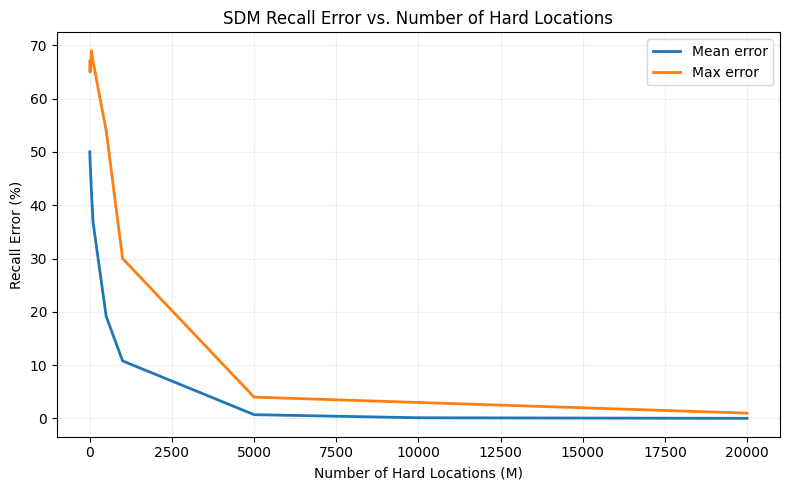

In [237]:
from tqdm import tqdm

num_locations = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000]
mean_errors = []
max_errors = []

# Outer loop over activation thresholds. 
for M in tqdm(num_locations):
    SDM = KanervaSDM(
        address_dimension=100,
        memory_dimension=100,
        num_locations=M,  
        activation_threshold=38
    )
    num_memories = 1000

    # Preallocate arrays. 
    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    # Write memories.
    for i in range(num_memories):
        address = np.random.randint(0, 2, SDM.address_dimension)
        memory = address.copy()
        addresses[i] = address
        memories[i] = memory
        SDM.write(address, memory)

    # Read memories. 
    for i in range(num_memories):
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    # Calculate errors. 
    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_errors.append(max_error)

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(num_locations, mean_errors, linewidth=2, label="Mean error")
plt.plot(num_locations, max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Hard Locations (M)")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Hard Locations")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()